**IMPORTING DATA**

In [ ]:
import yfinance as yf

# Define the ticker symbol for S&P 500 (SPY is the ETF that tracks it)
ticker_symbol = "SPY"

# Define the start and end dates for your data
start_date = "2000-12-01"
end_date = "2023-09-01"

# Fetch historical S&P 500 data from Yahoo Finance
sp500_data = yf.download(ticker_symbol, start=start_date, end=end_date)

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  1 of 1 completed


In [ ]:
pip install fredapi


In [ ]:
from fredapi import Fred

# Replace 'YOUR_API_KEY' with your actual FRED API key
api_key = 'YOUR API KEY HERE'

# Initialize the FRED API client
fred = Fred(api_key=api_key)

# Define the series IDs for the economic indicators you want to retrieve
inflation_series_id = 'CPIAUCSL'  # Consumer Price Index for All Urban Consumers (CPI-U)
interest_rate_series_id = 'FEDFUNDS'  # Effective Federal Funds Rate
labor_openings_series_id = 'JTSJOL'  # Job Openings

# Fetch economic indicator data from FRED
inflation_data = fred.get_series(inflation_series_id,start=start_date, end=end_date)
interest_rate_data = fred.get_series(interest_rate_series_id,start=start_date, end=end_date)
labor_openings_data = fred.get_series(labor_openings_series_id,start=start_date, end=end_date)


In [ ]:
inflation_data.head(100)

1947-01-01    21.48
1947-02-01    21.62
1947-03-01    22.00
1947-04-01    22.00
1947-05-01    21.95
              ...  
1954-12-01    26.77
1955-01-01    26.77
1955-02-01    26.82
1955-03-01    26.79
1955-04-01    26.79
Length: 100, dtype: float64

In [ ]:
interest_rate_data.head(100)

1954-07-01    0.80
1954-08-01    1.22
1954-09-01    1.07
1954-10-01    0.85
1954-11-01    0.83
              ... 
1962-06-01    2.68
1962-07-01    2.71
1962-08-01    2.93
1962-09-01    2.90
1962-10-01    2.90
Length: 100, dtype: float64

In [ ]:
labor_openings_data.head(100)

2000-12-01    5088.0
2001-01-01    5234.0
2001-02-01    5097.0
2001-03-01    4762.0
2001-04-01    4615.0
               ...  
2008-11-01    3231.0
2008-12-01    3146.0
2009-01-01    2738.0
2009-02-01    2864.0
2009-03-01    2534.0
Length: 100, dtype: float64

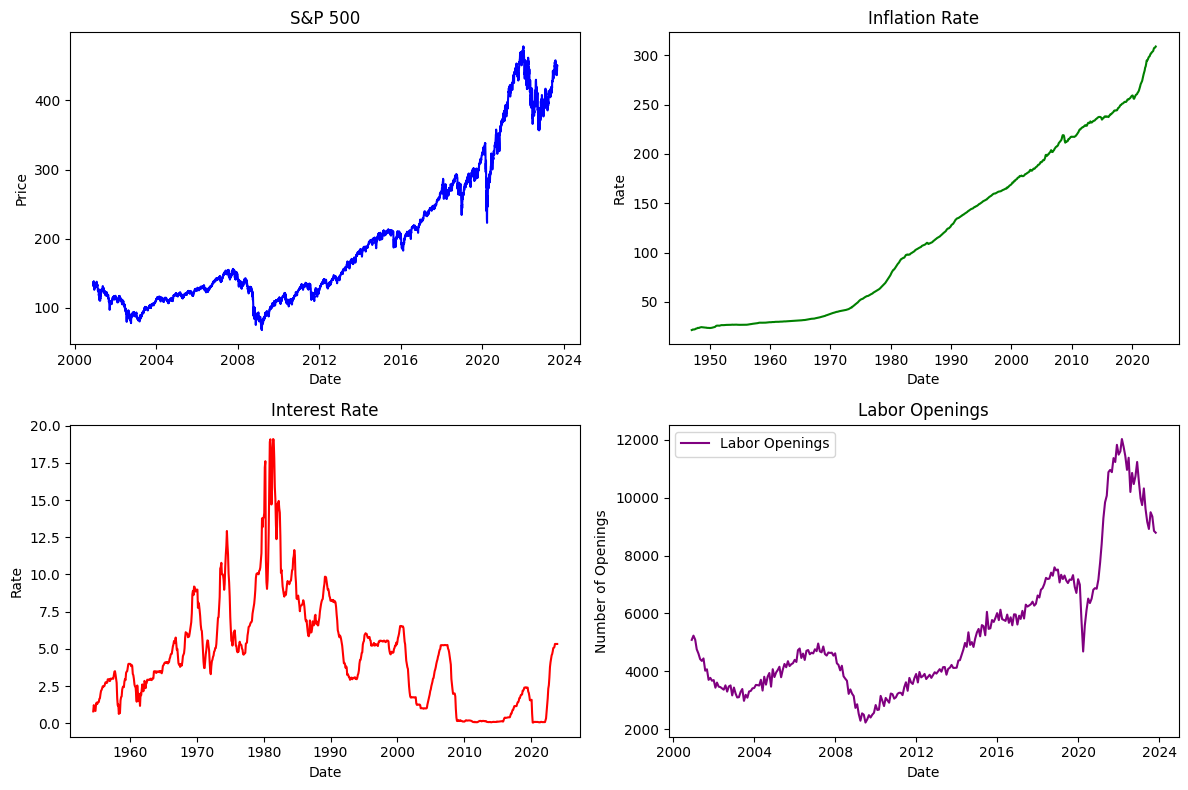

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and subplots for S&P 500 and economic data
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot S&P 500 data
axes[0, 0].plot(sp500_data.index, sp500_data['Close'], label='S&P 500', color='blue')
axes[0, 0].set_title('S&P 500')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Price')

# Plot inflation data
axes[0, 1].plot(inflation_data.index, inflation_data, label='Inflation Rate', color='green')
axes[0, 1].set_title('Inflation Rate')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Rate')

# Plot interest rate data
axes[1, 0].plot(interest_rate_data.index, interest_rate_data, label='Interest Rate', color='red')
axes[1, 0].set_title('Interest Rate')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Rate')

# Plot labor openings data
axes[1, 1].plot(labor_openings_data.index, labor_openings_data, label='Labor Openings', color='purple')
axes[1, 1].set_title('Labor Openings')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Number of Openings')

# Adjust layout and display legends
plt.tight_layout()
plt.legend()

# Show the plots
plt.show()


In [ ]:
import pandas as pd

# Convert the economic data Series to DataFrames with appropriate column names
inflation_df = pd.DataFrame({'Inflation_Rate': inflation_data})
interest_rate_df = pd.DataFrame({'Interest_Rate': interest_rate_data})
labor_openings_df = pd.DataFrame({'Labor_Openings': labor_openings_data})

# Merge the DataFrames with your S&P 500 data
merged_data = sp500_data.join([inflation_df, interest_rate_df, labor_openings_df], how='inner')


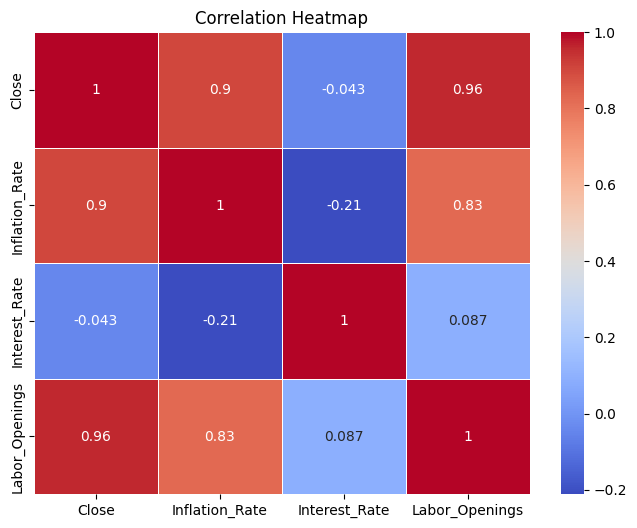

In [ ]:
import seaborn as sns

# Create a DataFrame containing all the data you want to analyze
# In this case, we'll use the merged_data DataFrame
data_to_analyze = merged_data[['Close', 'Inflation_Rate', 'Interest_Rate', 'Labor_Openings']]

# Calculate the correlation matrix
correlation_matrix = data_to_analyze.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
import pandas as pd

In [ ]:
# Convert the economic data Series to DataFrames with appropriate column names
inflation_df = pd.DataFrame({'Inflation_Rate': inflation_data})
interest_rate_df = pd.DataFrame({'Interest_Rate': interest_rate_data})
labor_openings_df = pd.DataFrame({'Labor_Openings': labor_openings_data})

# Merge the DataFrames with your S&P 500 data
merged_data = sp500_data.join([inflation_df, interest_rate_df, labor_openings_df], how='inner')

In [ ]:
# Calculate 7-day rolling mean and standard deviation of S&P 500 prices
merged_data['SMA_7'] = merged_data['Close'].rolling(window=7).mean()
merged_data['STD_7'] = merged_data['Close'].rolling(window=7).std()

# Calculate percentage change in S&P 500 prices
merged_data['Price_Change'] = merged_data['Close'].pct_change()

In [ ]:
merged_data = merged_data.iloc[6:]

In [ ]:
merged_data.head(100)

,Open,High,Low,Close,Adj Close,Volume,Inflation_Rate,Interest_Rate,Labor_Openings,SMA_7,STD_7,Price_Change
2001-10-01,103.900002,104.320000,102.830002,104.269997,68.649323,20457400,177.600,2.49,3707.0,124.986964,10.525639,-0.146098
2001-11-01,106.599998,109.010002,105.699997,108.510002,71.440857,29806800,177.500,2.09,3775.0,121.600000,11.573139,0.040664
2002-02-01,113.089996,113.300003,112.169998,112.650002,74.421631,15838500,178.000,1.74,3436.0,117.988572,9.360931,0.038153
2002-03-01,111.720001,113.849998,111.510002,113.739998,75.141724,26273600,178.500,1.73,3612.0,116.437144,8.974530,0.009676
2002-04-01,114.230003,115.099998,113.500000,114.570000,75.906883,17711000,179.300,1.75,3471.0,114.654286,7.657855,0.007297
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-04-01,187.619995,188.360001,187.000000,188.250000,157.811096,89193000,236.468,0.09,4566.0,168.592858,11.293420,0.068328
2014-05-01,188.220001,188.839996,187.729996,188.330002,157.878174,93019000,236.918,0.09,4747.0,173.204287,11.892734,0.000425
2014-07-01,196.199997,197.630005,196.130005,197.029999,165.962906,90470000,237.498,0.09,4846.0,178.740001,12.773958,0.046195
2014-08-01,192.559998,193.759995,191.570007,192.500000,162.147186,189261000,237.460,0.09,5349.0,183.188572,11.013542,-0.022991


In [ ]:
from sklearn.model_selection import train_test_split

# Define your features and target variable
X = merged_data[['SMA_7', 'STD_7', 'Inflation_Rate', 'Interest_Rate', 'Labor_Openings']]
y = merged_data['Price_Change']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)


**LINEAR REGRESSION MODEL**

In [ ]:
import numpy as np
import random
import tensorflow as tf

# Set a random seed for NumPy
np.random.seed(42)

# Set a random seed for Python's random module
random.seed(42)


In [ ]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict the price change for the test data
lr_predictions = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE and MSE
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)

print(f'lr_MAE: {lr_mae}')
print(f'lr_MSE: {lr_mse}')


lr_MAE: 0.04489643203934189
lr_MSE: 0.003669189354483057


In [ ]:
# Define a threshold for predictions (e.g., 0.01 for a small price change)
threshold = 0.01

# Calculate the direction of the price change based on the threshold
y_test_direction = np.where(y_test > threshold, 1, np.where(y_test < -threshold, -1, 0))
predictions_direction = np.where(lr_predictions > threshold, 1, np.where(lr_predictions < -threshold, -1, 0))

# Calculate the precision and accuracy
lr_precision = np.sum((y_test_direction == 1) & (predictions_direction == 1)) / np.sum(predictions_direction == 1)
lr_accuracy = np.sum(y_test_direction == predictions_direction) / len(predictions_direction)

# Calculate the Z-score of the accuracy
n = len(predictions_direction)
lr_z_score = (lr_accuracy - 0.5) / np.sqrt((0.5 * (1 - 0.5)) / n)

print(f'lr_Precision: {lr_precision}')
print(f'lr_Accuracy: {lr_accuracy}')
print(f'lr_Z-score: {lr_z_score}')


lr_Precision: 0.525
lr_Accuracy: 0.4338235294117647
lr_Z-score: -1.5434872662825792


**RANDOM FOREST MODEL**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forests model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict the price change for the test data
rf_predictions = rf_model.predict(X_test)

# Calculate MAE and MSE for Random Forests
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)

print("Random Forests Model:")
print(f'rf_MAE: {rf_mae}')
print(f'rf_MSE: {rf_mse}')


Random Forests Model:
rf_MAE: 0.04452258283788515
rf_MSE: 0.003809800500385898


In [ ]:
# Define a threshold for predictions (e.g., 0.01 for a small price change)
threshold = 0.01

# Calculate the direction of the price change based on the threshold
y_test_direction = np.where(y_test > threshold, 1, np.where(y_test < -threshold, -1, 0))
predictions_direction = np.where(rf_predictions > threshold, 1, np.where(rf_predictions < -threshold, -1, 0))

# Calculate the precision and accuracy
rf_precision = np.sum((y_test_direction == 1) & (predictions_direction == 1)) / np.sum(predictions_direction == 1)
rf_accuracy = np.sum(y_test_direction == predictions_direction) / len(predictions_direction)

# Calculate the Z-score of the accuracy
n = len(predictions_direction)
rf_z_score = (rf_accuracy - 0.5) / np.sqrt((0.5 * (1 - 0.5)) / n)

print(f'rf_Precision: {rf_precision}')
print(f'rf_Accuracy: {rf_accuracy}')
print(f'rf_Z-score: {rf_z_score}')

rf_Precision: 0.5384615384615384
rf_Accuracy: 0.4632352941176471
rf_Z-score: -0.8574929257125437


**LONG SHORT-TERM MEMORY MODEL**

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Reshape data for LSTM (samples, time steps, features)
X_train_lstm = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

# Create an LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the LSTM model to the training data
lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, verbose=0)

# Predict the price change for the test data using the LSTM model
lstm_predictions = lstm_model.predict(X_test_lstm).flatten()

# Calculate MAE and MSE for LSTM
lstm_mae = mean_absolute_error(y_test, lstm_predictions)
lstm_mse = mean_squared_error(y_test, lstm_predictions)

print("LSTM Model:")
print(f'lstm_MAE: {lstm_mae}')
print(f'lstm_MSE: {lstm_mse}')


5/5 [==============================] - 1s 6ms/step
LSTM Model:
lstm_MAE: 0.047451929832177824
lstm_MSE: 0.0032790014765368795


In [ ]:
# Define a threshold for predictions (e.g., 0.01 for a small price change)
threshold = 0.01

# Calculate the direction of the price change based on the threshold
y_test_direction = np.where(y_test > threshold, 1, np.where(y_test < -threshold, -1, 0))
predictions_direction = np.where(lstm_predictions > threshold, 1, np.where(lstm_predictions < -threshold, -1, 0))

# Calculate the precision and accuracy
lstm_precision = np.sum((y_test_direction == 1) & (predictions_direction == 1)) / np.sum(predictions_direction == 1)
lstm_accuracy = np.sum(y_test_direction == predictions_direction) / len(predictions_direction)

# Calculate the Z-score of the accuracy
lstm_n = len(predictions_direction)
lstm_z_score = (lstm_accuracy - 0.5) / np.sqrt((0.5 * (1 - 0.5)) / n)

print(f'lstm_Precision: {lstm_precision}')
print(f'lstm_Accuracy: {lstm_accuracy}')
print(f'lstm_Z-score: {lstm_z_score}')

lstm_Precision: nan
lstm_Accuracy: 0.3014705882352941
lstm_Z-score: -4.630461798847739


<ipython-input-24-3e2b773ad0f8>:9: RuntimeWarning: invalid value encountered in long_scalars
  lstm_precision = np.sum((y_test_direction == 1) & (predictions_direction == 1)) / np.sum(predictions_direction == 1)


In [ ]:
# Create a dictionary to store the scores for each model
scores = {
    'Model': ['Linear Regression', 'Random Forests', 'LSTM'],
    'MAE': [lr_mae, rf_mae, lstm_mae],
    'MSE': [lr_mse, rf_mse, lstm_mse],
    'Z-Score': [lr_z_score, rf_z_score, lstm_z_score],
    'Accuracy': [lr_accuracy, rf_accuracy, lstm_accuracy],
    'Precision': [lr_precision, rf_precision, lstm_precision]
}

# Create a DataFrame from the scores dictionary
scores_df = pd.DataFrame(scores)

# Display the comparison table
print(scores_df)

               Model       MAE       MSE   Z-Score  Accuracy  Precision
0  Linear Regression  0.044896  0.003669 -1.543487  0.433824   0.525000
1     Random Forests  0.044523  0.003810 -0.857493  0.463235   0.538462
2               LSTM  0.047452  0.003279 -4.630462  0.301471        NaN


In [ ]:
# Data for 0.8 fit sampling
data_0p8 = {
    'Model': ['Linear Regression', 'Random Forests', 'LSTM'],
    'MAE': [0.044526, 0.043300, 0.048092],
    'MSE': [0.003572, 0.003560, 0.003439],
    'Z-Score': [-2.057983, -0.685994, -4.801960],
    'Accuracy': [0.411765, 0.470588, 0.294118],
    'Precision': [0.537313, 0.587500, None]
}

# Data for 0.5 fit sampling
data_0p5 = {
    'Model': ['Linear Regression', 'Random Forests', 'LSTM'],
    'MAE': [0.037967, 0.040806, 0.036507],
    'MSE': [0.002284, 0.002798, 0.002158],
    'Z-Score': [-2.494700, -1.626978, 0.325396],
    'Accuracy': [0.364706, 0.411765, 0.517647],
    'Precision': [0.536585, 0.543478, 0.517647]
}

# Data for 0.2 fit sampling
data_0p2 = {
    'Model': ['Linear Regression', 'Random Forests', 'LSTM'],
    'MAE': [0.038565, 0.049855, 0.036391],
    'MSE': [0.002421, 0.003780, 0.002001],
    'Z-Score': [-1.028992, -2.057983, -3.429972],
    'Accuracy': [0.411765, 0.323529, 0.205882],
    'Precision': [0.473684, 0.450000, None]
}

# Create DataFrames for each fit sampling size
df_0p8 = pd.DataFrame(data_0p8)
df_0p5 = pd.DataFrame(data_0p5)
df_0p2 = pd.DataFrame(data_0p2)

# Display the comparison tables
print("\nFitting 0.8:")
print(df_0p8)

print("\nFitting 0.5:")
print(df_0p5)

print("\nFitting 0.2:")
print(df_0p2)



Fitting 0.8:
               Model       MAE       MSE   Z-Score  Accuracy  Precision
0  Linear Regression  0.044526  0.003572 -2.057983  0.411765   0.537313
1     Random Forests  0.043300  0.003560 -0.685994  0.470588   0.587500
2               LSTM  0.048092  0.003439 -4.801960  0.294118        NaN

Fitting 0.5:
               Model       MAE       MSE   Z-Score  Accuracy  Precision
0  Linear Regression  0.037967  0.002284 -2.494700  0.364706   0.536585
1     Random Forests  0.040806  0.002798 -1.626978  0.411765   0.543478
2               LSTM  0.036507  0.002158  0.325396  0.517647   0.517647

Fitting 0.2:
               Model       MAE       MSE   Z-Score  Accuracy  Precision
0  Linear Regression  0.038565  0.002421 -1.028992  0.411765   0.473684
1     Random Forests  0.049855  0.003780 -2.057983  0.323529   0.450000
2               LSTM  0.036391  0.002001 -3.429972  0.205882        NaN


**PLOTTING RESULTS**

LINEAR REGRESSION

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score


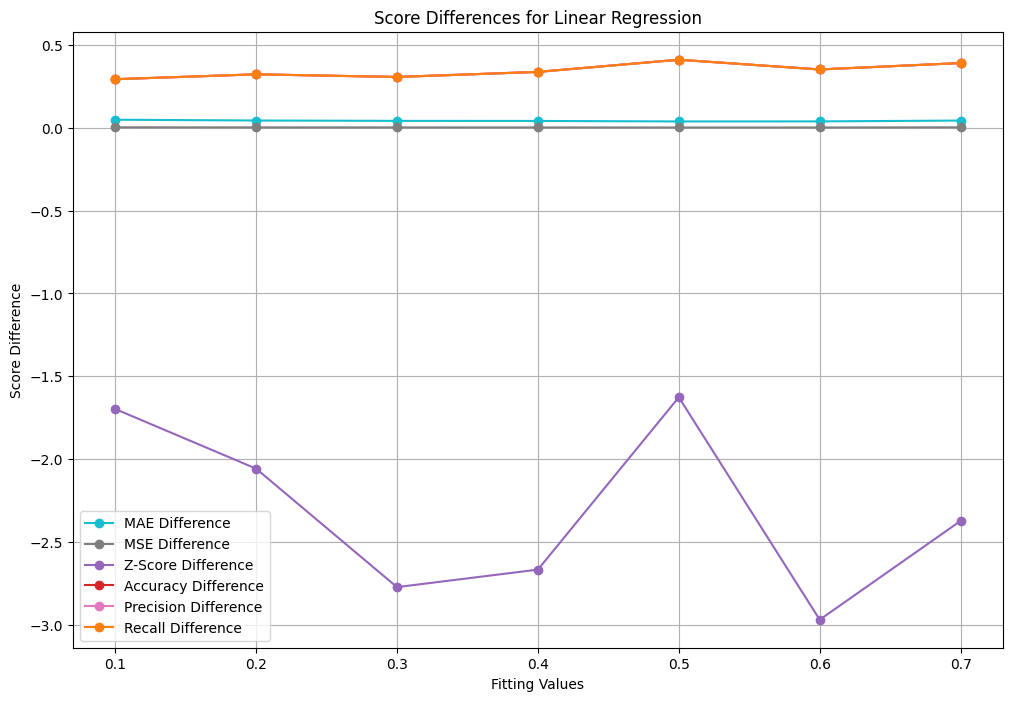

In [ ]:
# Set a random seed for NumPy
np.random.seed(42)

# Set a random seed for Python's random module
random.seed(42)

# Define the fitting values from 0.1 to 0.8 with a step of 0.1
fitting_values = np.arange(0.1, 0.9, 0.1)

# Initialize empty lists to store the differences in scores
lr_mae_differences = []
lr_mse_differences = []
lr_z_score_differences = []
lr_accuracy_differences = []
lr_precision_differences = []
lr_recall_differences = []

# Loop through fitting values and calculate scores
for i in range(len(fitting_values) - 1):
    # Define the fitting value for this iteration
    fitting_value = fitting_values[i]

    # Split the data into training and testing sets with the current fitting value
    X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(
        X, y, test_size=fitting_value, random_state=42
    )

    # Create a Linear Regression lr_model
    lr_model = LinearRegression()

    # Fit the lr_model to the training data
    lr_model.fit(X_train_sampled, y_train_sampled)

    # Predict the price change for the test data
    lr_predictions = lr_model.predict(X_test_sampled)

    # Define a threshold for predictions (e.g., 0.01 for a small price change)
    threshold = 0.01

    # Calculate the direction of the price change based on the threshold
    y_test_direction = np.where(y_test_sampled > threshold, 1, np.where(y_test_sampled < -threshold, -1, 0))
    lr_predictions_direction = np.where(lr_predictions > threshold, 1, np.where(lr_predictions < -threshold, -1, 0))

    # Calculate MAE and MSE for the lr_predictions
    lr_mae_score = mean_absolute_error(y_test_sampled, lr_predictions)
    lr_mse_score = mean_squared_error(y_test_sampled, lr_predictions)

    # Calculate Z-score, accuracy, and precision
    lr_z_score = (accuracy_score(y_test_direction, lr_predictions_direction) - 0.5) / np.sqrt(
        (0.5 * (1 - 0.5)) / len(y_test_sampled)
    )
    lr_accuracy = accuracy_score(y_test_direction, lr_predictions_direction)
    lr_precision = precision_score(y_test_direction, lr_predictions_direction, average='micro')  # Use binary average
    lr_recall = recall_score(y_test_direction, lr_predictions_direction, average='micro')

    # Append the differences to the lists
    lr_mae_differences.append(lr_mae_score)
    lr_mse_differences.append(lr_mse_score)
    lr_z_score_differences.append(lr_z_score)
    lr_accuracy_differences.append(lr_accuracy)
    lr_precision_differences.append(lr_precision)
    lr_recall_differences.append(lr_recall)

# Create a line chart to visualize the differences with colorblind-friendly colors
plt.figure(figsize=(12, 8))
plt.plot(fitting_values[:-1], lr_mae_differences, label='MAE Difference', marker='o', color='tab:cyan')
plt.plot(fitting_values[:-1], lr_mse_differences, label='MSE Difference', marker='o', color='tab:gray')
plt.plot(fitting_values[:-1], lr_z_score_differences, label='Z-Score Difference', marker='o', color='tab:purple')
plt.plot(fitting_values[:-1], lr_accuracy_differences, label='Accuracy Difference', marker='o', color='tab:red')
plt.plot(fitting_values[:-1], lr_precision_differences, label='Precision Difference', marker='o', color='tab:pink')
plt.plot(fitting_values[:-1], lr_recall_differences, label='Recall Difference', marker='o', color='tab:orange')
plt.xlabel('Fitting Values')
plt.ylabel('Score Difference')
plt.title('Score Differences for Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

RANDOM FOREST

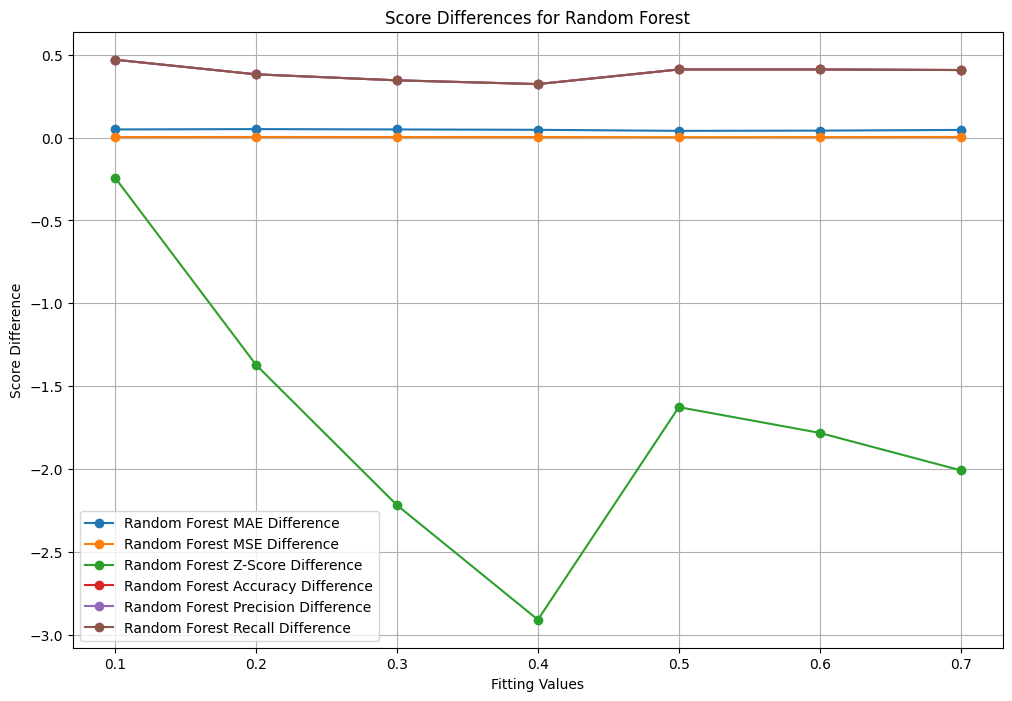

In [ ]:
# Initialize empty lists to store the differences in scores for Random Forest
rf_mae_differences = []
rf_mse_differences = []
rf_z_score_differences = []
rf_accuracy_differences = []
rf_precision_differences = []
rf_recall_differences = []

# Loop through fitting values and calculate scores for Random Forest
for i in range(len(fitting_values) - 1):
    # Define the fitting value for this iteration
    fitting_value = fitting_values[i]

    # Split the data into training and testing sets with the current fitting value
    X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(
        X, y, test_size=fitting_value, random_state=42
    )

    # Create a Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Fit the model to the training data
    rf_model.fit(X_train_sampled, y_train_sampled)

    # Predict the price change for the test data
    rf_predictions = rf_model.predict(X_test_sampled)

    # Define a threshold for predictions (e.g., 0.01 for a small price change)
    threshold = 0.01

    # Calculate the direction of the price change based on the threshold
    y_test_direction = np.where(y_test_sampled > threshold, 1, np.where(y_test_sampled < -threshold, -1, 0))
    predictions_direction = np.where(rf_predictions > threshold, 1, np.where(rf_predictions < -threshold, -1, 0))

    # Calculate MAE and MSE for Random Forest
    rf_mae_score = mean_absolute_error(y_test_sampled, rf_predictions)
    rf_mse_score = mean_squared_error(y_test_sampled, rf_predictions)

    # Calculate Z-score, accuracy, and precision for Random Forest
    rf_z_score = (accuracy_score(y_test_direction, predictions_direction) - 0.5) / np.sqrt(
        (0.5 * (1 - 0.5)) / len(y_test_sampled)
    )
    rf_accuracy = accuracy_score(y_test_direction, predictions_direction)
    rf_precision = precision_score(y_test_direction, predictions_direction, average='micro')  # Use binary average
    rf_recall = recall_score(y_test_direction, predictions_direction, average='micro')

    # Append the differences to the lists for Random Forest
    rf_mae_differences.append(rf_mae_score)
    rf_mse_differences.append(rf_mse_score)
    rf_z_score_differences.append(rf_z_score)
    rf_accuracy_differences.append(rf_accuracy)
    rf_precision_differences.append(rf_precision)
    rf_recall_differences.append(rf_recall)

# Create a line chart to visualize the differences for Random Forest
plt.figure(figsize=(12, 8))
plt.plot(fitting_values[:-1], rf_mae_differences, label='Random Forest MAE Difference', marker='o', color='tab:blue')
plt.plot(fitting_values[:-1], rf_mse_differences, label='Random Forest MSE Difference', marker='o', color='tab:orange')
plt.plot(fitting_values[:-1], rf_z_score_differences, label='Random Forest Z-Score Difference', marker='o', color='tab:green')
plt.plot(fitting_values[:-1], rf_accuracy_differences, label='Random Forest Accuracy Difference', marker='o', color='tab:red')
plt.plot(fitting_values[:-1], rf_precision_differences, label='Random Forest Precision Difference', marker='o', color='tab:purple')
plt.plot(fitting_values[:-1], rf_recall_differences, label='Random Forest Recall Difference', marker='o', color='tab:brown')
plt.xlabel('Fitting Values')
plt.ylabel('Score Difference')
plt.title('Score Differences for Random Forest')
plt.legend()
plt.grid(True)
plt.show()

LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Initialize empty lists to store the differences in scores for LSTM
lstm_mae_differences = []
lstm_mse_differences = []
lstm_z_score_differences = []
lstm_accuracy_differences = []
lstm_precision_differences = []
lstm_recall_differences = []

# Loop through fitting values and calculate scores for LSTM
for i in range(len(fitting_values) - 1):
    # Define the fitting value for this iteration
    fitting_value = fitting_values[i]

    # Split the data into training and testing sets with the current fitting value
    X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(
        X, y, test_size=fitting_value, random_state=42
    )

    # Reshape data for LSTM (samples, time steps, features)
    X_train_lstm = X_train_sampled.values.reshape(X_train_sampled.shape[0], 1, X_train_sampled.shape[1])
    X_test_lstm = X_test_sampled.values.reshape(X_test_sampled.shape[0], 1, X_test_sampled.shape[1])

    # Create an LSTM model
    lstm_model = Sequential()
    lstm_model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
    lstm_model.add(Dense(1))
    lstm_model.compile(loss='mean_squared_error', optimizer='adam')

    # Fit the LSTM model to the training data
    lstm_model.fit(X_train_lstm, y_train_sampled, epochs=50, batch_size=32, verbose=0)

    # Predict the price change for the test data using the LSTM model
    lstm_predictions = lstm_model.predict(X_test_lstm).flatten()

    # Define a threshold for predictions (e.g., 0.01 for a small price change)
    threshold = 0.01

    # Calculate the direction of the price change based on the threshold
    y_test_direction = np.where(y_test_sampled > threshold, 1, np.where(y_test_sampled < -threshold, -1, 0))
    predictions_direction = np.where(lstm_predictions > threshold, 1, np.where(lstm_predictions < -threshold, -1, 0))

    # Calculate MAE and MSE for LSTM
    lstm_mae_score = mean_absolute_error(y_test_sampled, lstm_predictions)
    lstm_mse_score = mean_squared_error(y_test_sampled, lstm_predictions)

    # Calculate Z-score, accuracy, and precision for LSTM
    lstm_z_score = (accuracy_score(y_test_direction, predictions_direction) - 0.5) / np.sqrt(
        (0.5 * (1 - 0.5)) / len(y_test_sampled)
    )
    lstm_accuracy = accuracy_score(y_test_direction, predictions_direction)
    lstm_precision = precision_score(y_test_direction, predictions_direction, average='micro')  # Use binary average
    lstm_recall = recall_score(y_test_direction, predictions_direction, average='micro')

    # Append the differences to the lists for LSTM
    lstm_mae_differences.append(lstm_mae_score)
    lstm_mse_differences.append(lstm_mse_score)
    lstm_z_score_differences.append(lstm_z_score)
    lstm_accuracy_differences.append(lstm_accuracy)
    lstm_precision_differences.append(lstm_precision)
    lstm_recall_differences.append(lstm_recall)

# Create a line chart to visualize the differences for LSTM
plt.figure(figsize=(12, 8))
plt.plot(fitting_values[:-1], lstm_mae_differences, label='LSTM MAE Difference', marker='o', color='tab:blue')
plt.plot(fitting_values[:-1], lstm_mse_differences, label='LSTM MSE Difference', marker='o', color='tab:orange')
plt.plot(fitting_values[:-1], lstm_z_score_differences, label='LSTM Z-Score Difference', marker='o', color='tab:green')
plt.plot(fitting_values[:-1], lstm_accuracy_differences, label='LSTM Accuracy Difference', marker='o', color='tab:red')
plt.plot(fitting_values[:-1], lstm_precision_differences, label='LSTM Precision Difference', marker='o', color='tab:purple')
plt.plot(fitting_values[:-1], lstm_recall_differences, label='LSTM Recall Difference', marker='o', color='tab:brown')
plt.xlabel('Fitting Values')
plt.ylabel('Score Difference')
plt.title('Score Differences for LSTM')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'fitting_values' is not defined

**PLOTTING COMPARISSON BETWEEN MODELS**

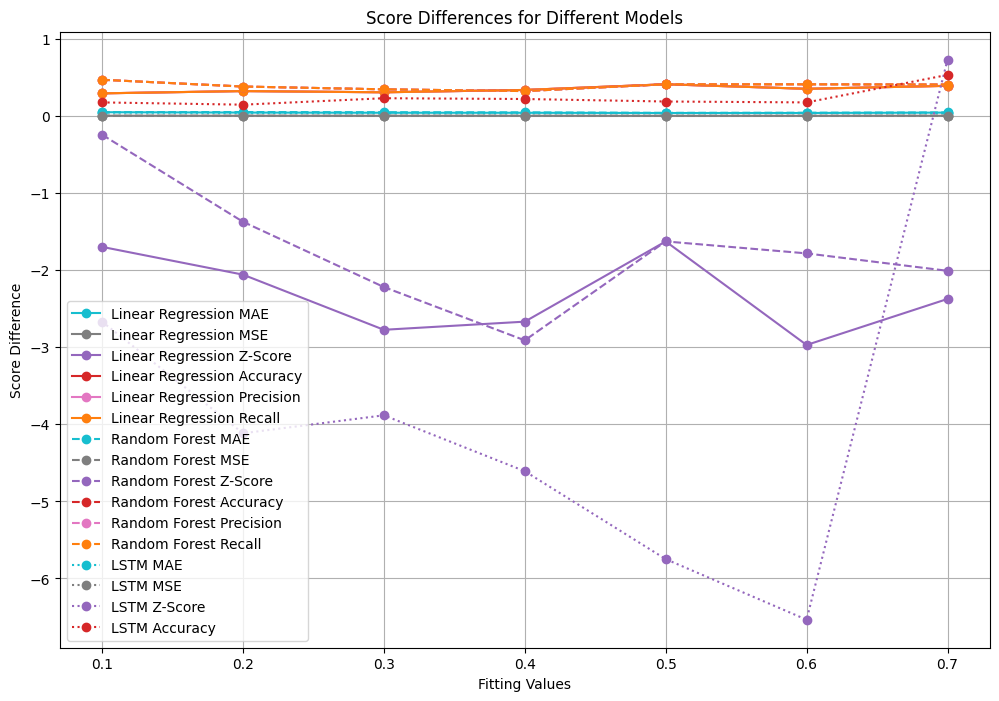

In [ ]:
import matplotlib.pyplot as plt

# Create a line chart to visualize the differences with colorblind-friendly colors
plt.figure(figsize=(12, 8))

# Plot Linear Regression metrics
plt.plot(fitting_values[:-1], lr_mae_differences, label='Linear Regression MAE', marker='o', color='tab:cyan')
plt.plot(fitting_values[:-1], lr_mse_differences, label='Linear Regression MSE', marker='o', color='tab:gray')
plt.plot(fitting_values[:-1], lr_z_score_differences, label='Linear Regression Z-Score', marker='o', color='tab:purple')
plt.plot(fitting_values[:-1], lr_accuracy_differences, label='Linear Regression Accuracy', marker='o', color='tab:red')
plt.plot(fitting_values[:-1], lr_precision_differences, label='Linear Regression Precision', marker='o', color='tab:pink')
plt.plot(fitting_values[:-1], lr_recall_differences, label='Linear Regression Recall', marker='o', color='tab:orange')

# Plot Random Forest metrics
plt.plot(fitting_values[:-1], rf_mae_differences, label='Random Forest MAE', marker='o', linestyle='dashed', color='tab:cyan')
plt.plot(fitting_values[:-1], rf_mse_differences, label='Random Forest MSE', marker='o', linestyle='dashed', color='tab:gray')
plt.plot(fitting_values[:-1], rf_z_score_differences, label='Random Forest Z-Score', marker='o', linestyle='dashed', color='tab:purple')
plt.plot(fitting_values[:-1], rf_accuracy_differences, label='Random Forest Accuracy', marker='o', linestyle='dashed', color='tab:red')
plt.plot(fitting_values[:-1], rf_precision_differences, label='Random Forest Precision', marker='o', linestyle='dashed', color='tab:pink')
plt.plot(fitting_values[:-1], rf_recall_differences, label='Random Forest Recall', marker='o', linestyle='dashed', color='tab:orange')

# Plot LSTM metrics
plt.plot(fitting_values[:-1], lstm_mae_differences, label='LSTM MAE', marker='o', linestyle='dotted', color='tab:cyan')
plt.plot(fitting_values[:-1], lstm_mse_differences, label='LSTM MSE', marker='o', linestyle='dotted', color='tab:gray')
plt.plot(fitting_values[:-1], lstm_z_score_differences, label='LSTM Z-Score', marker='o', linestyle='dotted', color='tab:purple')
plt.plot(fitting_values[:-1], lstm_accuracy_differences, label='LSTM Accuracy', marker='o', linestyle='dotted', color='tab:red')

plt.xlabel('Fitting Values')
plt.ylabel('Score Difference')
plt.title('Score Differences for Different Models')
plt.legend()
plt.grid(True)
plt.show()


**IMPORTING AND MERGING UP TO DATE HISTORICAL DATA**

In [ ]:
from datetime import datetime

In [ ]:
# Define the ticker symbol for S&P 500 (SPY is the ETF that tracks it)
ticker_symbol = "SPY"

# Define the start and end dates for your data
start_date = "2000-12-01"
end_date =  datetime.today().strftime('%d-%m-%Y')

# Fetch historical S&P 500 data from Yahoo Finance
sp500_data_uptodate = yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPY']: ValueError("time data '23-01-2024' does not match format '%Y-%m-%d'")


In [ ]:
# Replace 'YOUR_API_KEY' with your actual FRED API key
api_key = 'YOUR API KEY HERE'

# Initialize the FRED API client
fred = Fred(api_key=api_key)

# Define the series IDs for the economic indicators you want to retrieve
inflation_series_id = 'CPIAUCSL'  # Example: Consumer Price Index for All Urban Consumers (CPI-U)
interest_rate_series_id = 'FEDFUNDS'  # Example: Effective Federal Funds Rate
labor_openings_series_id = 'JTSJOL'  # Example: Job Openings, Total Nonfarm

# Fetch economic indicator data from FRED
inflation_data_uptodate = fred.get_series(inflation_series_id,start=start_date, end=end_date)
interest_rate_data_uptodate = fred.get_series(interest_rate_series_id,start=start_date, end=end_date)
labor_openings_data_uptodate = fred.get_series(labor_openings_series_id,start=start_date, end=end_date)


In [ ]:
# Convert the economic data Series to DataFrames with appropriate column names
inflation_df_uptodate = pd.DataFrame({'Inflation_Rate': inflation_data})
interest_rate_df_uptodate = pd.DataFrame({'Interest_Rate': interest_rate_data})
labor_openings_df_uptodate = pd.DataFrame({'Labor_Openings': labor_openings_data})

# Merge the DataFrames with your S&P 500 data
merged_data_uptodate = sp500_data.join([inflation_df_uptodate, interest_rate_df_uptodate, labor_openings_df_uptodate], how='inner')

In [ ]:
# Calculate 7-day rolling mean and standard deviation of S&P 500 prices
merged_data_uptodate['SMA_7'] = merged_data_uptodate['Close'].rolling(window=7).mean()
merged_data_uptodate['STD_7'] = merged_data_uptodate['Close'].rolling(window=7).std()

# Calculate percentage change in S&P 500 prices
merged_data_uptodate['Price_Change'] = merged_data_uptodate['Close'].pct_change()

In [ ]:
merged_data_uptodate = merged_data_uptodate.iloc[6:]

In [ ]:
merged_data_uptodate.head(-1)

,Open,High,Low,Close,Adj Close,Volume,Inflation_Rate,Interest_Rate,Labor_Openings,SMA_7,STD_7,Price_Change
2001-10-01,103.900002,104.320000,102.830002,104.269997,68.649300,20457400,177.600,2.49,3707.0,124.986964,10.525639,-0.146098
2001-11-01,106.599998,109.010002,105.699997,108.510002,71.440865,29806800,177.500,2.09,3775.0,121.600000,11.573139,0.040664
2002-02-01,113.089996,113.300003,112.169998,112.650002,74.421646,15838500,178.000,1.74,3436.0,117.988572,9.360931,0.038153
2002-03-01,111.720001,113.849998,111.510002,113.739998,75.141731,26273600,178.500,1.73,3612.0,116.437144,8.974530,0.009676
2002-04-01,114.230003,115.099998,113.500000,114.570000,75.906898,17711000,179.300,1.75,3471.0,114.654286,7.657855,0.007297
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,408.769989,410.000000,404.750000,407.380005,399.446777,76398200,298.990,4.10,11234.0,406.119999,23.822809,0.059451
2023-02-01,405.209991,413.670013,402.350006,410.799988,404.649841,101459200,301.648,4.57,9974.0,400.102853,12.802186,0.008395
2023-03-01,395.410004,396.690002,393.380005,394.739990,388.830292,99706800,301.808,4.65,9745.0,397.981424,12.183507,-0.039094
2023-05-01,415.470001,417.619995,415.269989,415.510010,410.851410,62122300,303.294,5.06,9616.0,402.877141,11.179046,0.052617


**RUNNING LSTM MODEL ON UP TO DATE DATA WITH 0.5 FITTING**

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define your features and target variable
X = merged_data_uptodate[['SMA_7', 'STD_7', 'Inflation_Rate', 'Interest_Rate', 'Labor_Openings']]
y = merged_data_uptodate['Price_Change']

# Spliting the data into training, validation, and test sets
# training (50%) and temporary (50%)
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)

# Spliting the temporary set into validation (25%) and test (25%)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaler on training data
X_train_lstm = scaler.fit_transform(X_train_temp)

# Transform validation and test data using the same scaler
X_validation_lstm = scaler.transform(X_validation)
X_test_lstm = scaler.transform(X_test)

# Reshape data for LSTM (samples, time steps, features)
num_features = X_train_temp.shape[1]  # Number of features
X_train_lstm = X_train_lstm.reshape(X_train_temp.shape[0], 1, num_features)
X_validation_lstm = X_validation_lstm.reshape(X_validation.shape[0], 1, num_features)
X_test_lstm = X_test_lstm.reshape(X_test.shape[0], 1, num_features)

# Create an LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the LSTM model to the training data and validate on the validation set
lstm_model.fit(X_train_lstm, y_train_temp, epochs=50, validation_data=(X_validation_lstm, y_validation), callbacks=[early_stopping])

# Predict the price change for the test data using the LSTM model
lstm_predictions = lstm_model.predict(X_test_lstm).flatten()


NameError: name 'Sequential' is not defined

In [ ]:
selected_features = ['Inflation_Rate',	'Interest_Rate',	'Labor_Openings',	'SMA_7',	'STD_7']
historical_data_lstm = merged_data_uptodate[selected_features].values

In [ ]:
sequence_length = 5
historical_data_lstm = np.array([historical_data_lstm[i:i+sequence_length] for i in range(len(historical_data_lstm)-sequence_length+1)])

historical_data_lstm.shape


In [ ]:
sequence_length = 5
num_features = 5

# Reshape the data
historical_data_lstm = historical_data_lstm.reshape(-1, 1, num_features)

# Now, historical_data_lstm should have the shape (num_samples, 1, 5)
lstm_predictions = lstm_model.predict(historical_data_lstm)

historical_data_lstm.shape

In [ ]:
lstm_predictions = lstm_model.predict(historical_data_lstm)

In [ ]:
# Define the date for which you want to make a prediction
target_date = '2024-06-21'

# Extract the prediction for the specific date (e.g., the last date in the sequence)
predicted_price_change = lstm_predictions[-1][0]

# Assuming you want to predict the Close price, you can add the predicted price change to the previous Close price
# Access the Z-axis value directly from the NumPy array
previous_close_price = historical_data_lstm[-1][0][0]  # Replace [0][0] with the appropriate indices for your Z-axis

predicted_close_price = previous_close_price * (1 + predicted_price_change)

# Print the predicted Close price for the future date
print(f"Predicted Close Price for {target_date}: {predicted_close_price:.2f}")
